<a href="https://colab.research.google.com/github/tishajeswani33/Technical-training-project-/blob/main/TT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Street Parking Violation Analysis
Urban areas face serious parking violation issues which lead to traffic congestion
and inefficient enforcement planning.

## Objective:
- Analyze parking-related violations using an open-source dataset
- Identify most common violation types
- Understand temporal patterns (day-wise)
- Help authorities plan better enforcement strategies

## Tools Used:
- Pandas for Data Analysis
- Seaborn for Open-source dataset
- Matplotlib & Seaborn for Visualization
-gradio for UI/UX

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [ ]:
df =sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.isnull().sum()
df = df.rename(columns={
    "total_bill":"fine_amount",
    "size":"vehicle_count"

})
df.head()

,fine_amount,tip,sex,smoker,day,time,vehicle_count
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df["fine_amount"].describe()
df.groupby("day")["fine_amount"].mean()
df["time"].value_counts()

/tmp/ipython-input-4044704241.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("day")["fine_amount"].mean()


,count
time,
Dinner,176
Lunch,68


/tmp/ipython-input-2243796460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="time",palette="pastel")


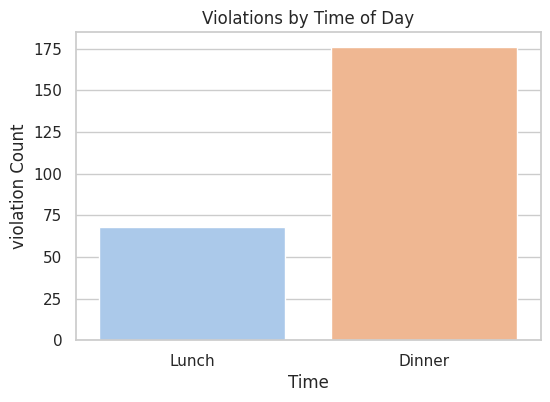

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="time",palette="pastel")
plt.title("Violations by Time of Day")
plt.xlabel("Time")
plt.ylabel("violation Count")
plt.show()

In [ ]:
df["parking_time"] = df["time"].map({
    "Lunch": "Morning/Afternoon",
    "Dinner": "Evening/Night"
})

df.head()

,fine_amount,tip,sex,smoker,day,time,vehicle_count,parking_time
0,16.99,1.01,Female,No,Sun,Dinner,2,Evening/Night
1,10.34,1.66,Male,No,Sun,Dinner,3,Evening/Night
2,21.01,3.50,Male,No,Sun,Dinner,3,Evening/Night
3,23.68,3.31,Male,No,Sun,Dinner,2,Evening/Night
4,24.59,3.61,Female,No,Sun,Dinner,4,Evening/Night


In [ ]:
df.columns

Index(['fine_amount', 'tip', 'sex', 'smoker', 'day', 'vehicle_count',
       'parking_time'],
      dtype='object')

In [ ]:
if "time" in df.columns:
    df.drop(columns=["time"], inplace=True)


In [ ]:
df.drop(columns=["time"], inplace=True, errors="ignore")
df = sns.load_dataset("tips")
df["parking_time"] = df["time"].map({
    "Lunch": "Morning/Afternoon",
    "Dinner": "Evening/Night"
})
df.drop(columns=["time"], inplace=True)

df.head()

,total_bill,tip,sex,smoker,day,size,parking_time
0,16.99,1.01,Female,No,Sun,2,Evening/Night
1,10.34,1.66,Male,No,Sun,3,Evening/Night
2,21.01,3.50,Male,No,Sun,3,Evening/Night
3,23.68,3.31,Male,No,Sun,2,Evening/Night
4,24.59,3.61,Female,No,Sun,4,Evening/Night


/tmp/ipython-input-1455375719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="parking_time", palette="Set3")


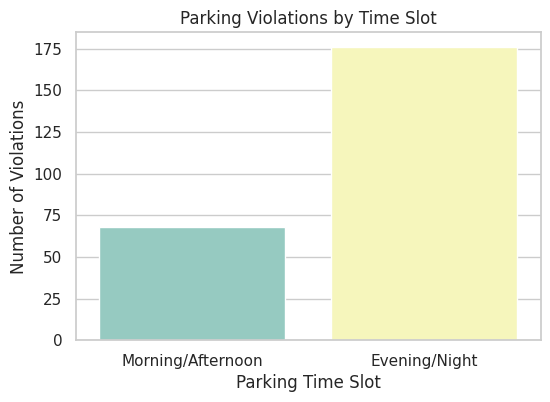

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="parking_time", palette="Set3")
plt.title("Parking Violations by Time Slot")
plt.xlabel("Parking Time Slot")
plt.ylabel("Number of Violations")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")

In [ ]:
base_df = sns.load_dataset("tips")
base_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
np.random.seed(42)

# Expand dataset 5 times
df = pd.concat([base_df]*5, ignore_index=True)

# Add Parking Time Slot
df["parking_time"] = df["time"].map({
    "Lunch": "Morning/Afternoon",
    "Dinner": "Evening/Night"
})
violation_types = [
    "No Parking Zone",
    "Expired Meter",
    "Double Parking",
    "Blocking Driveway",
    "Overtime Parking"
]

df["violation_type"] = np.random.choice(violation_types, size=len(df))

zones = ["Commercial", "Residential", "Market", "Office Area"]
df["zone"] = np.random.choice(zones, size=len(df))


df.rename(columns={
    "total_bill": "fine_amount",
    "size": "vehicle_count"
}, inplace=True)

df.drop(columns=["time"], inplace=True)

df.head()

,fine_amount,tip,sex,smoker,day,vehicle_count,parking_time,violation_type,zone
0,16.99,1.01,Female,No,Sun,2,Evening/Night,Blocking Driveway,Residential
1,10.34,1.66,Male,No,Sun,3,Evening/Night,Overtime Parking,Office Area
2,21.01,3.50,Male,No,Sun,3,Evening/Night,Double Parking,Market
3,23.68,3.31,Male,No,Sun,2,Evening/Night,Overtime Parking,Office Area
4,24.59,3.61,Female,No,Sun,4,Evening/Night,Overtime Parking,Market


/tmp/ipython-input-1275147883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


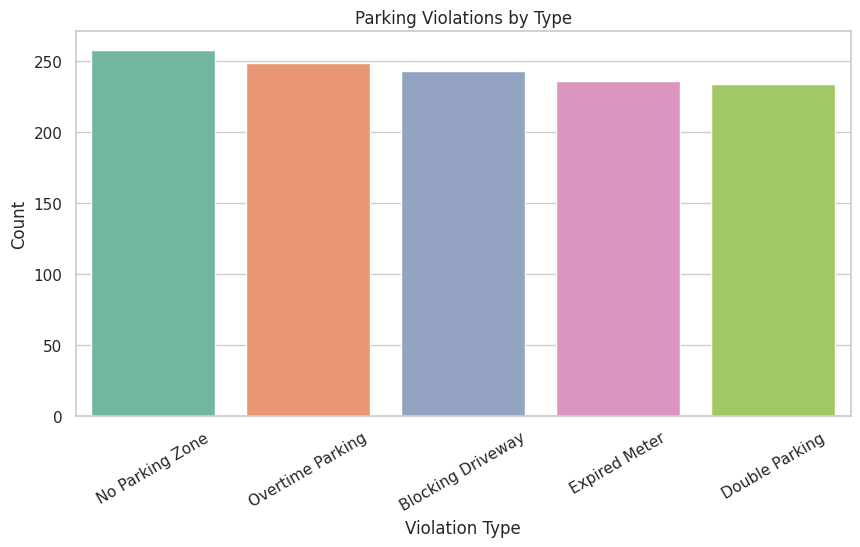

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x="violation_type",
    order=df["violation_type"].value_counts().index,
    palette="Set2"
)

plt.title("Parking Violations by Type")
plt.xlabel("Violation Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-4269685684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="parking_time", palette="Set3")


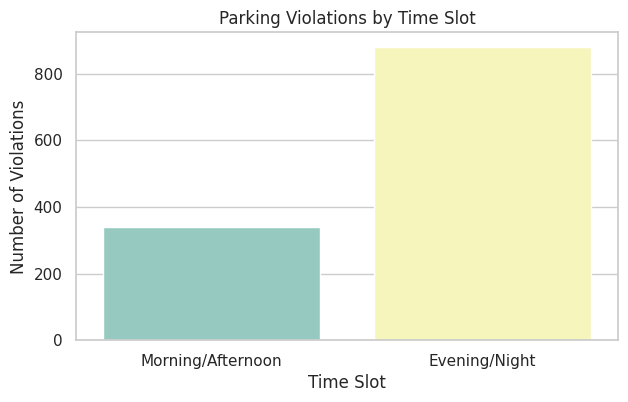

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="parking_time", palette="Set3")
plt.title("Parking Violations by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Number of Violations")
plt.show()

/tmp/ipython-input-859861801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


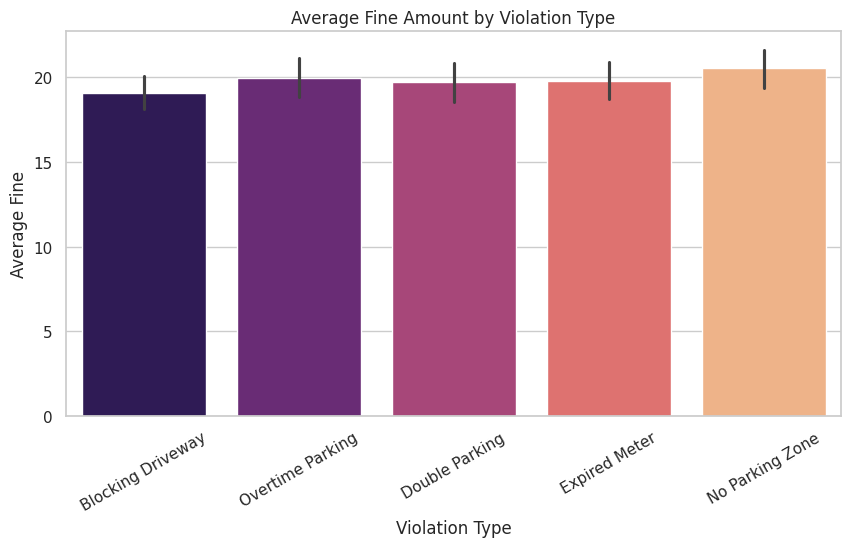

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=df,
    x="violation_type",
    y="fine_amount",
    estimator=np.mean,
    palette="magma"
)

plt.title("Average Fine Amount by Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("Average Fine")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-26309419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="zone", palette="coolwarm")


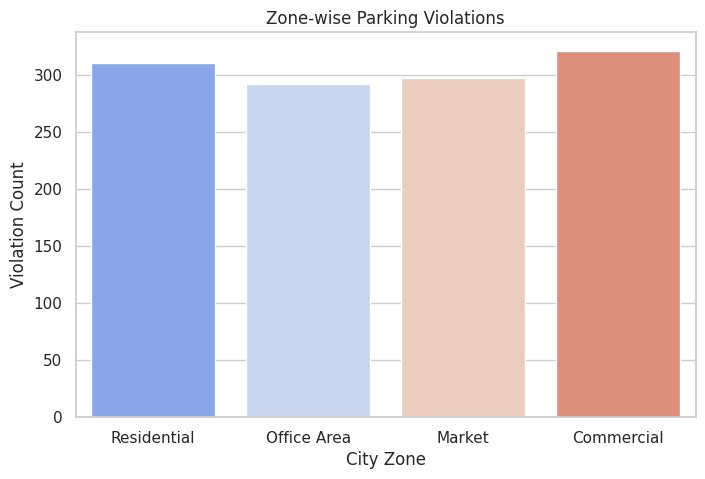

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="zone", palette="coolwarm")
plt.title("Zone-wise Parking Violations")
plt.xlabel("City Zone")
plt.ylabel("Violation Count")
plt.show()

In [ ]:
!pip install gradio


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr

sns.set(style="whitegrid")

In [ ]:
def create_parking_data():
    base_df = sns.load_dataset("tips")
    df = pd.concat([base_df]*5, ignore_index=True)

    df["parking_time"] = df["time"].map({
        "Lunch": "Morning/Afternoon",
        "Dinner": "Evening/Night"
    })

    violation_types = [
        "No Parking Zone",
        "Expired Meter",
        "Double Parking",
        "Blocking Driveway",
        "Overtime Parking"
    ]

    zones = ["Commercial", "Residential", "Market", "Office Area"]

    df["violation_type"] = np.random.choice(violation_types, len(df))
    df["zone"] = np.random.choice(zones, len(df))

    df.rename(columns={
        "total_bill": "fine_amount",
        "size": "vehicle_count"
    }, inplace=True)

    df.drop(columns=["time"], inplace=True)

    return df

In [ ]:
def plot_violation_type():
    df = create_parking_data()
    plt.figure(figsize=(8,4))
    sns.countplot(
        data=df,
        x="violation_type",
        order=df["violation_type"].value_counts().index
    )
    plt.xticks(rotation=25)
    plt.title("Parking Violations by Type")
    plt.tight_layout()
    return plt

In [ ]:
def plot_time_slot():
    df = create_parking_data()
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="parking_time")
    plt.title("Violations by Parking Time Slot")
    plt.tight_layout()
    return plt

In [ ]:
def plot_zone():
    df = create_parking_data()
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="zone")
    plt.title("Zone-wise Parking Violations")
    plt.tight_layout()
    return plt

In [ ]:
def plot_avg_fine():
    df = create_parking_data()
    plt.figure(figsize=(8,4))
    sns.barplot(
        data=df,
        x="violation_type",
        y="fine_amount",
        estimator=np.mean
    )
    plt.xticks(rotation=25)
    plt.title("Average Fine by Violation Type")
    plt.tight_layout()
    return plt

In [ ]:
def create_parking_data():
    base_df = sns.load_dataset("tips")
    df = pd.concat([base_df]*5, ignore_index=True)

    df["parking_time"] = df["time"].map({
        "Lunch": "Morning/Afternoon",
        "Dinner": "Evening/Night"
    })

    violation_types = [
        "No Parking Zone",
        "Expired Meter",
        "Double Parking",
        "Blocking Driveway",
        "Overtime Parking"
    ]

    zones = ["Commercial", "Residential", "Market", "Office Area"]

    df["violation_type"] = np.random.choice(violation_types, len(df))
    df["zone"] = np.random.choice(zones, len(df))

    df.rename(columns={
        "total_bill": "fine_amount",
        "size": "vehicle_count"
    }, inplace=True)

    df.drop(columns=["time"], inplace=True)

    return df

In [ ]:
def plot_violation_type():
    df = create_parking_data()
    plt.figure(figsize=(8,4))
    sns.countplot(
        data=df,
        x="violation_type",
        order=df["violation_type"].value_counts().index
    )
    plt.xticks(rotation=25)
    plt.title("Parking Violations by Type")
    plt.tight_layout()
    return plt

In [ ]:
def plot_time_slot():
    df = create_parking_data()
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="parking_time")
    plt.title("Violations by Parking Time Slot")
    plt.tight_layout()
    return plt

In [ ]:
def plot_zone():
    df = create_parking_data()
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="zone")
    plt.title("Zone-wise Parking Violations")
    plt.tight_layout()
    return plt

In [ ]:
def plot_avg_fine():
    df = create_parking_data()
    plt.figure(figsize=(8,4))
    sns.barplot(
        data=df,
        x="violation_type",
        y="fine_amount",
        estimator=np.mean
    )
    plt.xticks(rotation=25)
    plt.title("Average Fine by Violation Type")
    plt.tight_layout()
    return plt

In [ ]:
with gr.Blocks() as demo:

    gr.Markdown("""
    # 🚗 Smart Street Parking Violation Analysis
    ### Interactive Dashboard for Enforcement Planning
    """)

    with gr.Row():
        btn1 = gr.Button("📊 Violation Types")
        btn2 = gr.Button("⏰ Time Slot Analysis")

    with gr.Row():
        btn3 = gr.Button("🏙 Zone-wise Violations")
        btn4 = gr.Button("💰 Average Fine Analysis")

    with gr.Row():
        out1 = gr.Plot()
        out2 = gr.Plot()

    with gr.Row():
        out3 = gr.Plot()
        out4 = gr.Plot()

    btn1.click(plot_violation_type, outputs=out1)
    btn2.click(plot_time_slot, outputs=out2)
    btn3.click(plot_zone, outputs=out3)
    btn4.click(plot_avg_fine, outputs=out4)

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f1bf70b71b2bb9c89d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
